In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load and review data
mydata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
#ID(customer id)
#Customer Age
#Experience(tears of professional experience)
#Income(Annual income of customer)
#ZIP code(Home address)
#Family(Family size of the customer)
#CCAvg(Avg spending on credit card per month($000))
#Education(Education level: 1 = uner graduate, 2 = graduate, 3= professional)
#Mortgage(value of house mortgage, if any)
#Personal loan(Did the customer accepted the personal loan)
#Securities Account(Does the customer have a securities account with the bank?)
#CD Account(Does the customer have a certificate of deposit (CD)
account with the bank?)
#Online(Does the customer use internet banking facilities?)
#Credit card(Does the customer use a credit card issued by UniversalBank?)

mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
mydata.shape

(5000, 14)

In [4]:
# dropping ID and ZIP code 
# Replacing categorical variable with actual values
mydata = mydata.drop(['ID','ZIP Code'], axis=1)
mydata['Education'] = mydata['Education'].replace({1: 'Undergraduate', 2: 'Graduate', 3: 'Professional'})
mydata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergraduate,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergraduate,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergraduate,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [5]:
# create dummy variables for education
# using substitiutes like 1 for under graduate, 2 for graduate, 3 for proffesional
mydata = pd.get_dummies(mydata, columns=['Education'])
mydata.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0,0


In [6]:
# Dealing with missing values
mydata.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200,0.419200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391,0.493478
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
mydata.dtypes

Age                          int64
Experience                   int64
Income                       int64
Family                       int64
CCAvg                      float64
Mortgage                     int64
Personal Loan                int64
Securities Account           int64
CD Account                   int64
Online                       int64
CreditCard                   int64
Education_Graduate           uint8
Education_Professional       uint8
Education_Undergraduate      uint8
dtype: object

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Age                        5000 non-null int64
Experience                 5000 non-null int64
Income                     5000 non-null int64
Family                     5000 non-null int64
CCAvg                      5000 non-null float64
Mortgage                   5000 non-null int64
Personal Loan              5000 non-null int64
Securities Account         5000 non-null int64
CD Account                 5000 non-null int64
Online                     5000 non-null int64
CreditCard                 5000 non-null int64
Education_Graduate         5000 non-null uint8
Education_Professional     5000 non-null uint8
Education_Undergraduate    5000 non-null uint8
dtypes: float64(1), int64(10), uint8(3)
memory usage: 444.4 KB


In [9]:
#checking for null values in the dataset
mydata.isnull().sum()

Age                        0
Experience                 0
Income                     0
Family                     0
CCAvg                      0
Mortgage                   0
Personal Loan              0
Securities Account         0
CD Account                 0
Online                     0
CreditCard                 0
Education_Graduate         0
Education_Professional     0
Education_Undergraduate    0
dtype: int64

In [10]:
# As experience cannot be negative values, so filling negative values with zero.

def fixExperience(value):
    if value<0:
        return 0
    else: 
        return value
mydata['Experience'] = mydata.apply(lambda row:fixExperience(row['Experience']), axis = 1)
mydata.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200,0.419200
std,11.463166,11.440484,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391,0.493478
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


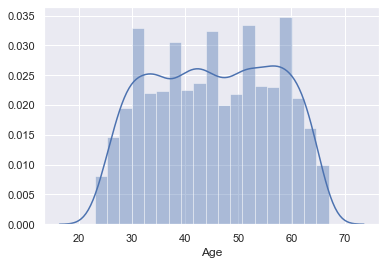

In [11]:
# Univariate analysis
sns.distplot(mydata['Age'])

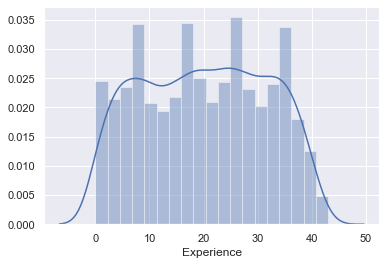

In [12]:
sns.distplot(mydata['Experience'])

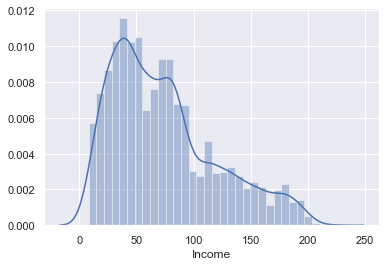

In [13]:
sns.distplot(mydata['Income'])

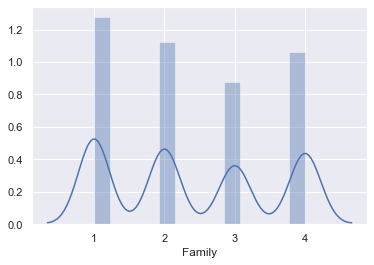

In [14]:
sns.distplot(mydata['Family'])

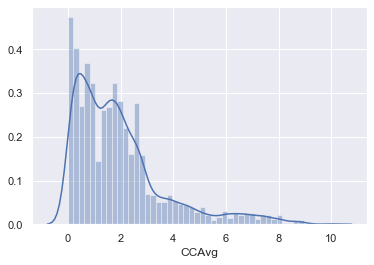

In [15]:
sns.distplot(mydata['CCAvg'])

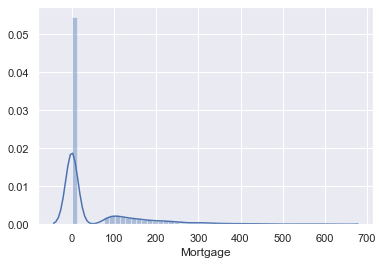

In [16]:
sns.distplot(mydata['Mortgage'])

In [ ]:
#From the above univariate analysis, Income, CCAvg and Mortgage are left skewed. 

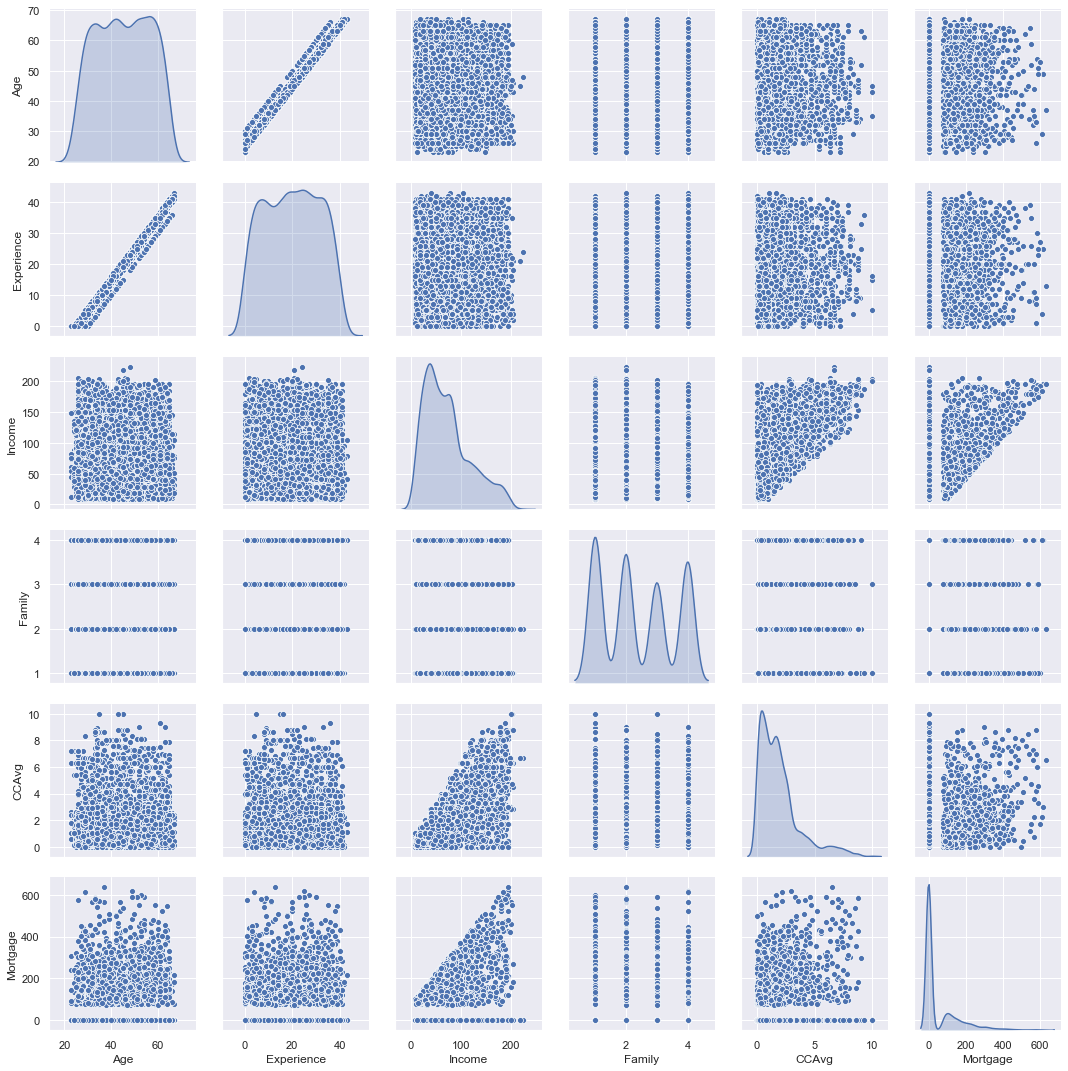

In [17]:
# Multi variate analysis
mydata_attr = mydata.iloc[:, 0:6]
sns.pairplot(mydata_attr, diag_kind = 'kde') # to plot density curve instead of histogram.

In [ ]:
# From the above multi variate analysis, age and experience have linear postive relationship. Income with CCAvg ang Mortgage are
having linear positive relationship. Family with size 3 are comparitively less. The customers having house mortgage are very few.

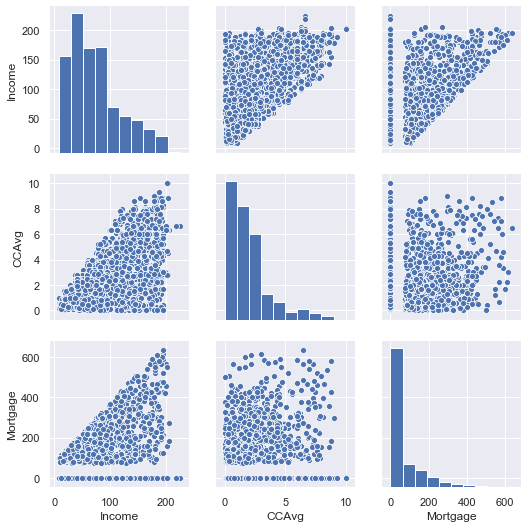

In [18]:
# Checking for outliers
sns.pairplot(mydata[['Income', 'CCAvg', 'Mortgage']])

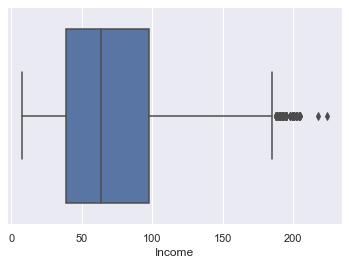

In [19]:
# Finding outliers with box plots.
sns.boxplot(mydata['Income'])

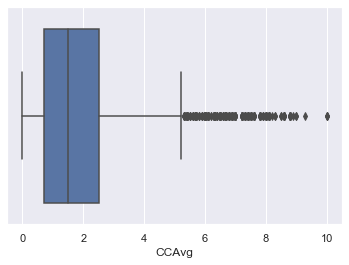

In [20]:
sns.boxplot(mydata['CCAvg'])

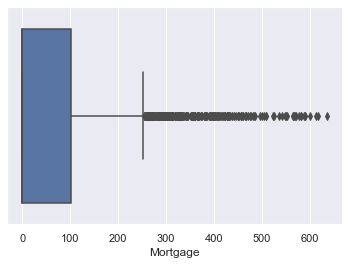

In [21]:
sns.boxplot(mydata['Mortgage'])

In [22]:
# Filling outliers with upper quartile(Q3)
# Naming with Income1, CCAvg1, Mortgage1
mydata["Income1"]= np.where(mydata["Income"]>=101,101,mydata["Income"])
mydata["CCAvg1"]=np.where(mydata["CCAvg"]>=2.5,2.5,mydata["CCAvg"])
mydata["Mortgage1"]= np.where(mydata["Mortgage"]>=101,101,mydata["Mortgage"])
mydata

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate,Income1,CCAvg1,Mortgage1
0,25,1.0,49,4,1.6,0,0,1,0,0,0,0,0,1,49,1.6,0
1,45,19.0,34,3,1.5,0,0,1,0,0,0,0,0,1,34,1.5,0
2,39,15.0,11,1,1.0,0,0,0,0,0,0,0,0,1,11,1.0,0
3,35,9.0,100,1,2.7,0,0,0,0,0,0,1,0,0,100,2.5,0
4,35,8.0,45,4,1.0,0,0,0,0,0,1,1,0,0,45,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,0,0,0,0,1,0,0,1,0,40,1.9,0
4996,30,4.0,15,4,0.4,85,0,0,0,1,0,0,0,1,15,0.4,85
4997,63,39.0,24,2,0.3,0,0,0,0,0,0,0,1,0,24,0.3,0
4998,65,40.0,49,3,0.5,0,0,0,0,1,0,1,0,0,49,0.5,0


In [23]:
# Dropping Income, CCAvg and mortgage colomuns.
mydata = mydata.drop(['Income','CCAvg', 'Mortgage'], axis=1)
mydata

,Age,Experience,Family,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate,Income1,CCAvg1,Mortgage1
0,25,1.0,4,0,1,0,0,0,0,0,1,49,1.6,0
1,45,19.0,3,0,1,0,0,0,0,0,1,34,1.5,0
2,39,15.0,1,0,0,0,0,0,0,0,1,11,1.0,0
3,35,9.0,1,0,0,0,0,0,1,0,0,100,2.5,0
4,35,8.0,4,0,0,0,0,1,1,0,0,45,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,1,0,0,0,1,0,0,1,0,40,1.9,0
4996,30,4.0,4,0,0,0,1,0,0,0,1,15,0.4,85
4997,63,39.0,2,0,0,0,0,0,0,1,0,24,0.3,0
4998,65,40.0,3,0,0,0,1,0,1,0,0,49,0.5,0


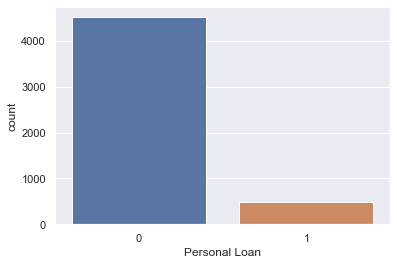

In [24]:
# Target column distribution. i.e, Personal loan
sns.countplot(mydata['Personal Loan'])

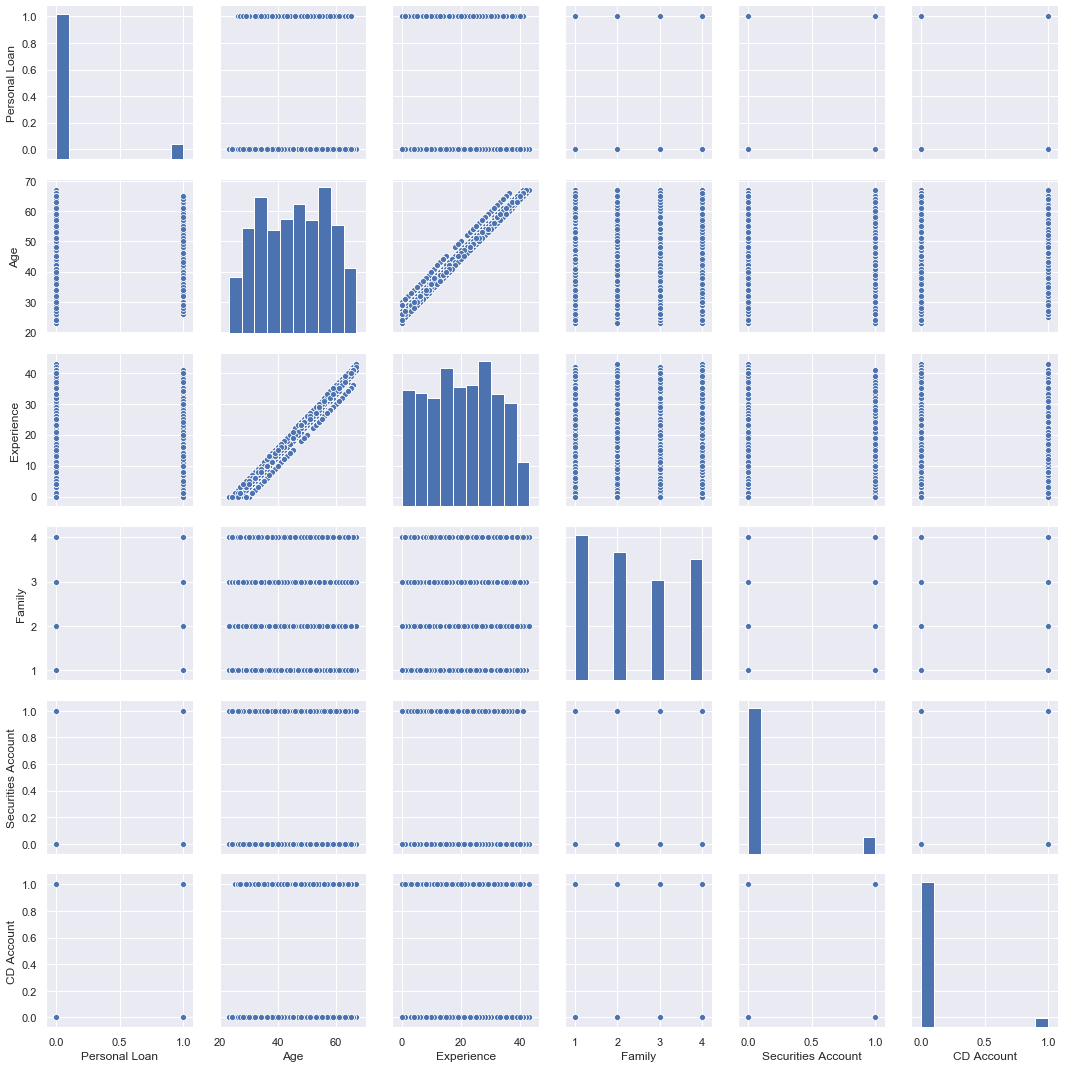

In [25]:
# Data Distribution of 'Personal Loan' across all variables.
sns.pairplot(mydata[['Personal Loan', 'Age','Experience','Family','Securities Account','CD Account']])

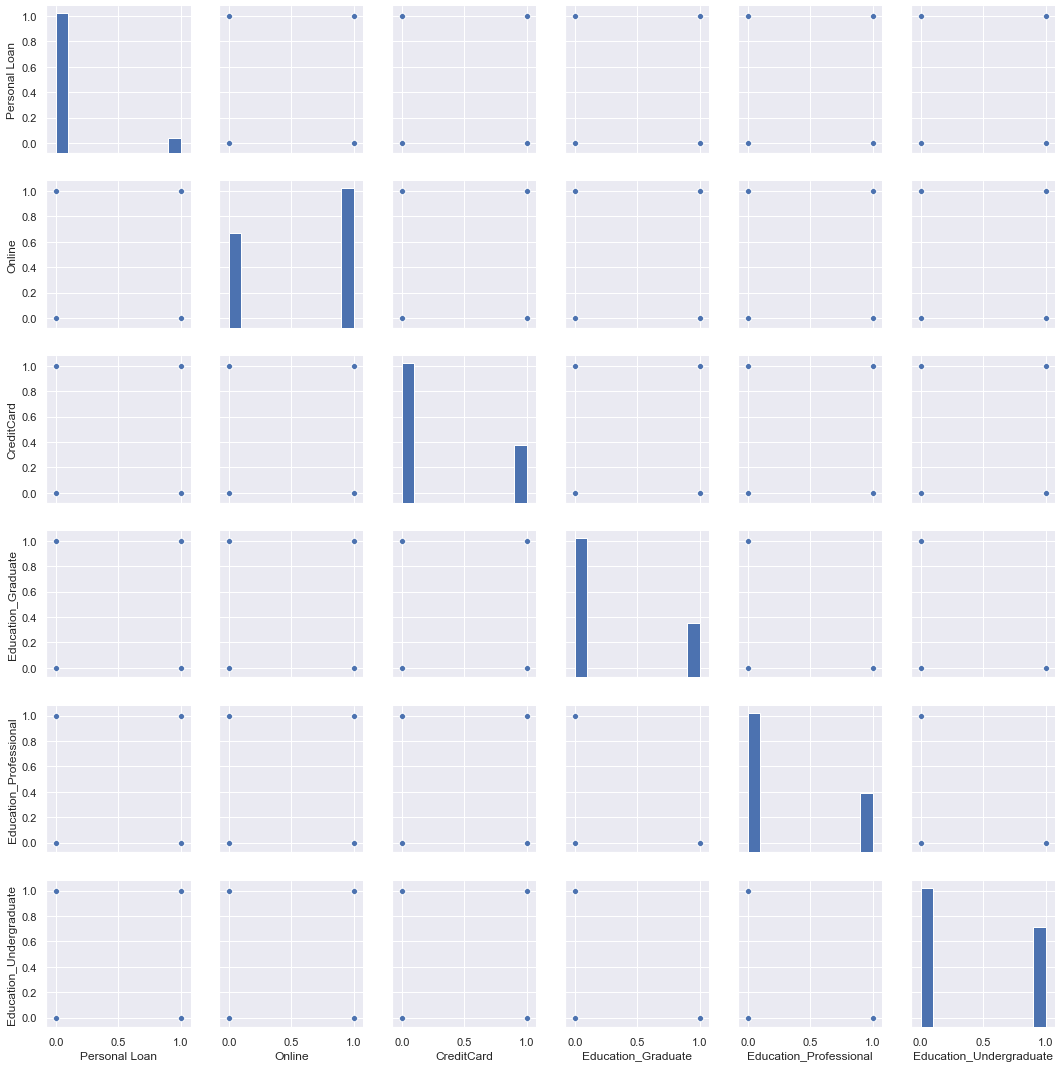

In [26]:
sns.pairplot(mydata[['Personal Loan','Online','CreditCard','Education_Graduate','Education_Professional','Education_Undergraduate']])

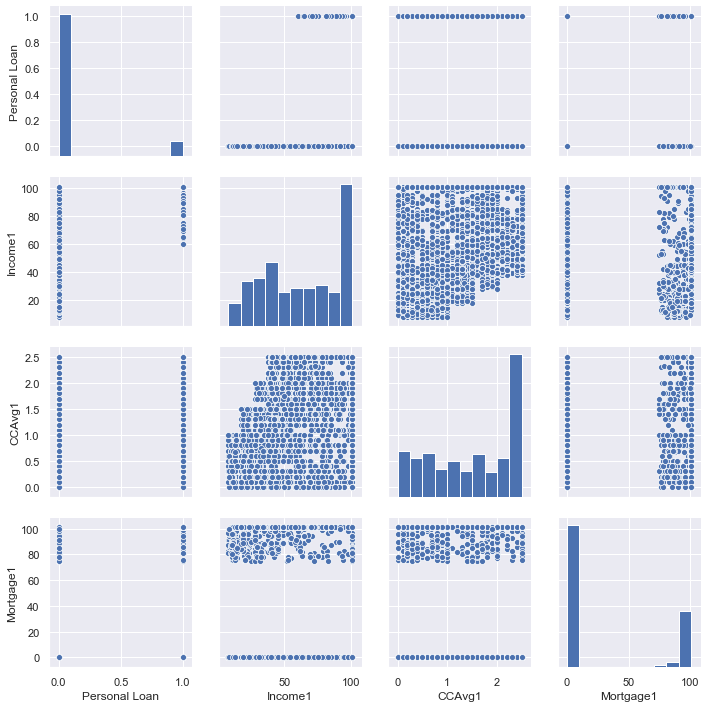

In [27]:
sns.pairplot(mydata[['Personal Loan','Income1','CCAvg1','Mortgage1']])

In [26]:
# Load the data into a data-frame.
mydata.to_csv("new1.csv")

In [27]:
mydata.columns

Index(['Age', 'Experience', 'Family', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Education_Graduate',
       'Education_Professional', 'Education_Undergraduate', 'Income1',
       'CCAvg1', 'Mortgage1'],
      dtype='object')

In [28]:
# Split data
x_data = mydata[['Age', 'Experience', 'Family', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Education_Graduate',
       'Education_Professional', 'Education_Undergraduate', 'Income1',
       'CCAvg1', 'Mortgage1']]
y_data = mydata['Personal Loan']

In [29]:
from sklearn.preprocessing import MinMaxScaler
x_data.head()

,Age,Experience,Family,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate,Income1,CCAvg1,Mortgage1
0,25,1.0,4,1,0,0,0,0,0,1,49,1.6,0
1,45,19.0,3,1,0,0,0,0,0,1,34,1.5,0
2,39,15.0,1,0,0,0,0,0,0,1,11,1.0,0
3,35,9.0,1,0,0,0,0,1,0,0,100,2.5,0
4,35,8.0,4,0,0,0,1,1,0,0,45,1.0,0


In [30]:
# Transform the data i.e, scaling the data.
scalar = MinMaxScaler()
scalar.fit(x_data)
New_data = scalar.transform(x_data)
New_data

array([[0.04545455, 0.02325581, 1.        , ..., 0.44086022, 0.64      ,
        0.        ],
       [0.5       , 0.44186047, 0.66666667, ..., 0.27956989, 0.6       ,
        0.        ],
       [0.36363636, 0.34883721, 0.        , ..., 0.03225806, 0.4       ,
        0.        ],
       ...,
       [0.90909091, 0.90697674, 0.33333333, ..., 0.17204301, 0.12      ,
        0.        ],
       [0.95454545, 0.93023256, 0.66666667, ..., 0.44086022, 0.2       ,
        0.        ],
       [0.11363636, 0.09302326, 0.66666667, ..., 0.80645161, 0.32      ,
        0.        ]])

In [31]:
# Split x and y into training and test set in 70:30 ratio.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state =1)

In [32]:
x_train.head()

,Age,Experience,Family,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate,Income1,CCAvg1,Mortgage1
1334,47,22.0,2,0,0,1,0,0,0,1,35,1.3,0
4768,38,14.0,1,0,0,1,0,1,0,0,39,2.0,0
65,59,35.0,1,0,0,1,1,0,0,1,101,2.5,0
177,29,3.0,4,0,0,0,0,1,0,0,65,1.8,101
4489,39,13.0,3,0,0,1,0,1,0,0,21,0.2,0


In [33]:
#Logistic Regression
# Creating logistic regression model and the performance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
# Accurcay score
model_score = model.score(x_test, y_test)
print(model_score)

0.944


In [34]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
print(cm)

[[  85   64]
 [  20 1331]]


In [35]:
# Accuracy score
print(metrics.accuracy_score(y_test, y_predict))

0.944


In [36]:
# Create ROC curve
# Calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc= roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])

FPR= FP/(FP+TN) = 0.0458
TPR= TP/(TP+FN) = 0.8095

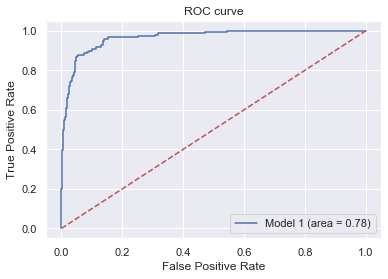

In [37]:
plt.figure()
plt.plot(fpr,tpr, label = "Model 1 (area = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.show()

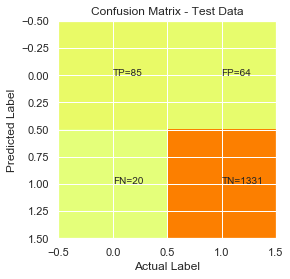

In [38]:
# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict,labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [39]:
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
# Predicting the test set results
y_predict = classifier.predict(x_test)

In [41]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

In [43]:
accuracy

0.9473333333333334

In [44]:
# Classification report to check precision, recall and f1 score
from sklearn.metrics import classification_report
print(classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.78      0.66      0.71       149

    accuracy                           0.95      1500
   macro avg       0.87      0.82      0.84      1500
weighted avg       0.94      0.95      0.95      1500



In [45]:
# Precision recall curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

In [46]:
precision

array([0.09933333, 0.77777778, 1.        ])

In [47]:
recall

array([1.        , 0.65771812, 0.        ])

In [48]:
thresholds

array([0, 1], dtype=int64)

In [49]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [50]:
# convert all attributes to z score

XScaled = x_data.apply(zscore)
XScaled.describe()

,Age,Experience,Family,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergraduate,Income1,CCAvg1,Mortgage1
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,5.595524e-17,7.850609e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-2.122302e-16,-3.148592e-17,-6.365575e-16,3.852474e-17,4.687362e-17,-6.896705e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.758808e+00,-1.216855e+00,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01,-1.877318e+00,-1.701395e+00,-6.647250e-01
25%,-9.019702e-01,-8.846315e-01,-1.216855e+00,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01,-8.355362e-01,-8.947662e-01,-6.647250e-01
50%,-2.952359e-02,-1.045515e-02,-3.454321e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01,4.610726e-03,2.709583e-02,-6.647250e-01
75%,8.429230e-01,8.637212e-01,5.259909e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00,1.177071e+00,1.147211e+00,1.179423e+00,1.549885e+00
max,1.889859e+00,2.000150e+00,1.397414e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00,1.177071e+00,1.248028e+00,1.179423e+00,1.549885e+00


In [51]:
# split x and y inti training and test set

x_train, x_test, y_train, y_test = train_test_split(XScaled, y_data, test_size = 0.30, random_state=1)

In [52]:
# Build KNN Model

NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [53]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [54]:
# Evaluate Performance of KNN Model

predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.942

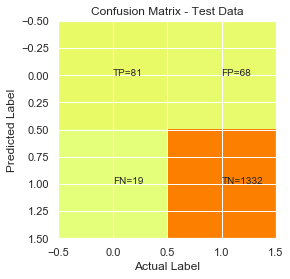

In [55]:
# calculate accuracy measures and confusion matrix

cm = metrics.confusion_matrix(y_test, predicted_labels, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()


In [56]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_labels, labels = [1,0])
print(cm)

[[  81   68]
 [  19 1332]]


In [57]:
# Accuracy score
print(metrics.accuracy_score(y_test, predicted_labels))

0.942


In [58]:
# Create ROC curve
# Calculate the fpr and tpr for all thresholds of the classification

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc= roc_auc_score(y_test, NNH.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, NNH.predict_proba(x_test)[:,1])

FPR = FP/(FP+TN) = 0.0485
TPR = TP/(TP+FN) = 0.81

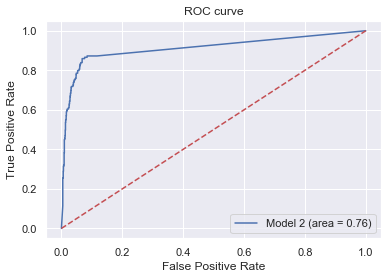

In [59]:
plt.figure()
plt.plot(fpr,tpr, label = "Model 2 (area = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.show()

In [60]:
# Fitting Kernel SVM to the training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
# Predicting the test set results
predicted_labels = classifier.predict(x_test)

In [62]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_labels)
accuracy

0.9473333333333334

In [64]:
# Classification report to check precision, recall and f1 score

from sklearn.metrics import classification_report
print(classification_report (y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.78      0.65      0.71       149

    accuracy                           0.95      1500
   macro avg       0.87      0.82      0.84      1500
weighted avg       0.94      0.95      0.95      1500



In [65]:
# Precision recall curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predicted_labels)

In [66]:
precision

array([0.09933333, 0.78225806, 1.        ])

In [67]:
recall

array([1.        , 0.65100671, 0.        ])

In [68]:
thresholds

array([0, 1], dtype=int64)

In [69]:
# Build Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
loan_model = GaussianNB()
loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
# Performance of our model with training data
loan_train_predict = loan_model.predict(x_train)
from sklearn import metrics

# model accuracy for training data
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy: 0.9477



In [71]:
# Performance of our model with testing data
loan_test_predict = loan_model.predict(x_test)
from sklearn import metrics

# model accuracy for testing data
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy: 0.9420



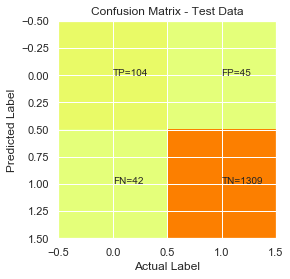

In [72]:
# Lets check confusion matrix and classification report
cm = metrics.confusion_matrix(y_test, loan_test_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [73]:
# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, loan_test_predict, labels = [1,0])
print(cm)

[[ 104   45]
 [  42 1309]]


In [74]:
# Accuracy score
print(metrics.accuracy_score(y_test, loan_test_predict))

0.942


In [75]:
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
# Predicting the test set results
loan_test_predict = classifier.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, loan_test_predict)
accuracy

0.9473333333333334

In [78]:
# Create ROC curve
# Calculate the fpr and tpr for all thresholds of the classification

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc= roc_auc_score(y_test, loan_model.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, loan_model.predict_proba(x_test)[:,1])

FPR = FP/(FP+TN) = 0.0332
TPR = TP/(TP+FN) = 0.7123

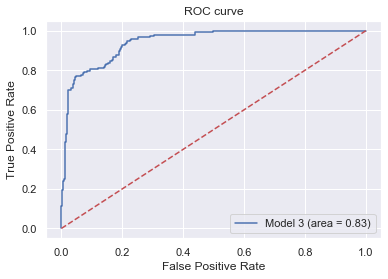

In [79]:
plt.figure()
plt.plot(fpr,tpr, label = "Model 3 (area = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.show()

In [80]:
# Classification report to check precision, recall and f1 score
from sklearn.metrics import classification_report
print(classification_report (y_test, loan_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.78      0.65      0.71       149

    accuracy                           0.95      1500
   macro avg       0.87      0.82      0.84      1500
weighted avg       0.94      0.95      0.95      1500



In [81]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, loan_test_predict)

In [82]:
precision

array([0.09933333, 0.78225806, 1.        ])

In [83]:
recall

array([1.        , 0.65100671, 0.        ])

In [84]:
thresholds

array([0, 1], dtype=int64)

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [89]:
# feature normalization
feat_norm= False

In [90]:
# Linear Regression
linear=LinearRegression(normalize=feat_norm)
errors=cross_val_score(linear,x_data, y_data, scoring='neg_mean_squared_error', cv=10)
mean_error=np.mean(errors)
print(-mean_error)

0.06115857453019509


In [ ]:
# Comparing the three models, logistic regression model gives more accurate results. KNN and Naive bayes models gave almost same result.
# overall range estimate is approximately 95% confidence for the model performance in production